<a href="https://colab.research.google.com/github/praveensurya2808/EV_Trend_analysis/blob/main/Ev_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(ev_data)

        VIN (1-10)     County           City State  Postal Code  Model Year  \
0       5YJYGDEE1L       King        Seattle    WA      98122.0        2020   
1       7SAYGDEE9P  Snohomish        Bothell    WA      98021.0        2023   
2       5YJSA1E4XK       King        Seattle    WA      98109.0        2019   
3       5YJSA1E27G       King       Issaquah    WA      98027.0        2016   
4       5YJYGDEE5M     Kitsap      Suquamish    WA      98392.0        2021   
...            ...        ...            ...   ...          ...         ...   
177861  7SAYGDEE3N     Pierce    Bonney Lake    WA      98391.0        2022   
177862  KM8K23AG1P      Mason        Shelton    WA      98584.0        2023   
177863  5YJYGDEE6M      Grant         Quincy    WA      98848.0        2021   
177864  WVGKMPE27M       King  Black Diamond    WA      98010.0        2021   
177865  5YJ3E1EA8M     Pierce         Tacoma    WA      98422.0        2021   

              Make          Model           Electri

In [2]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [3]:
ev_data.isnull().sum()

,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [4]:
ev_data= ev_data.dropna()
ev_data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


/tmp/ipython-input-1126695794.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values,palette='viridis')


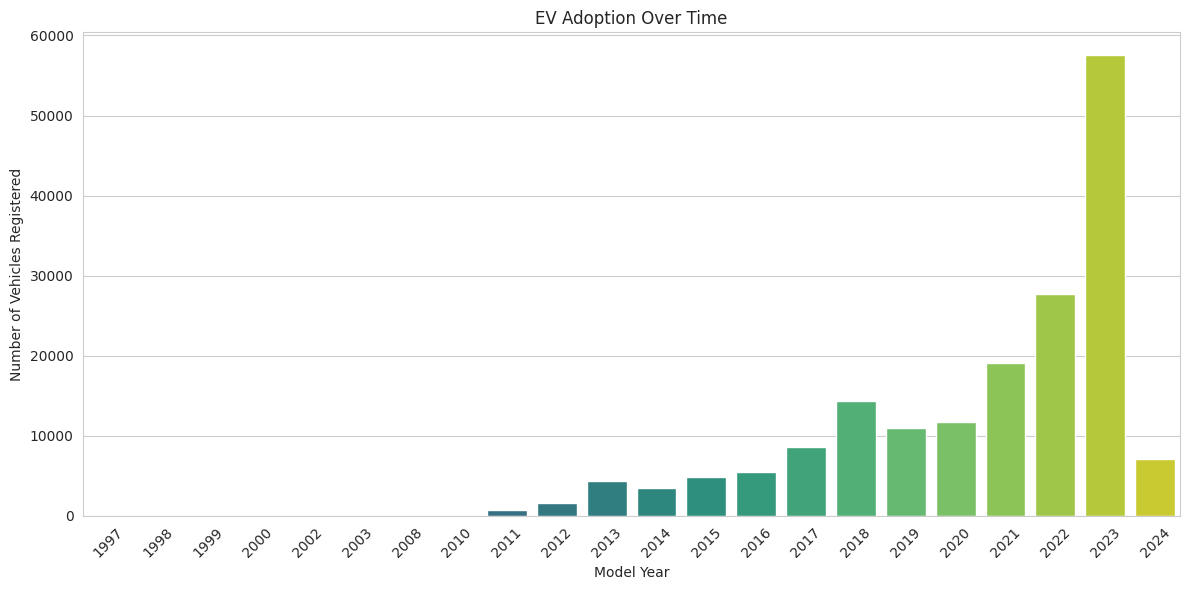

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


#EV adoption overtime

plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values,palette='viridis')
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

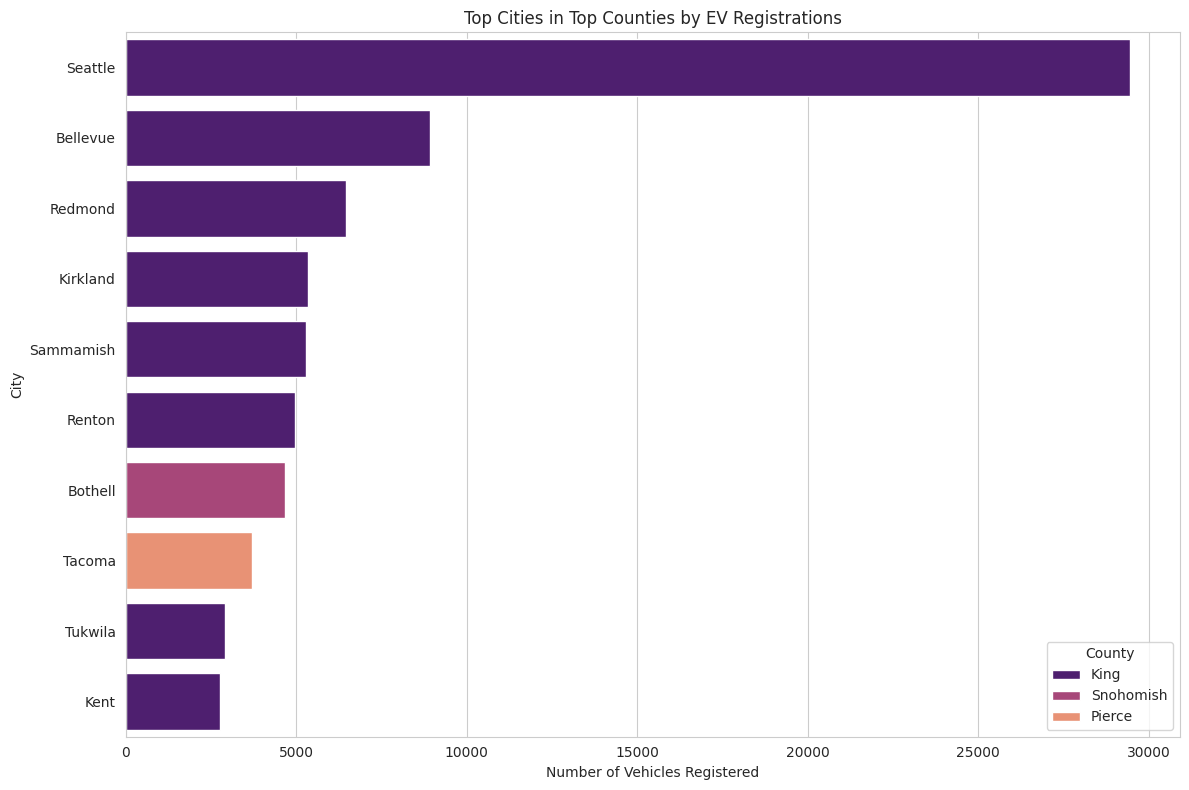

In [16]:
#top 3 countries of EV adoption

ev_country_distribution = ev_data['County'].value_counts()
top_3_countries = ev_country_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_3_countries)]

ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)


plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1287367440.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Ev_vehicle_distribution.values,y=Ev_vehicle_distribution.index,palette='rocket')


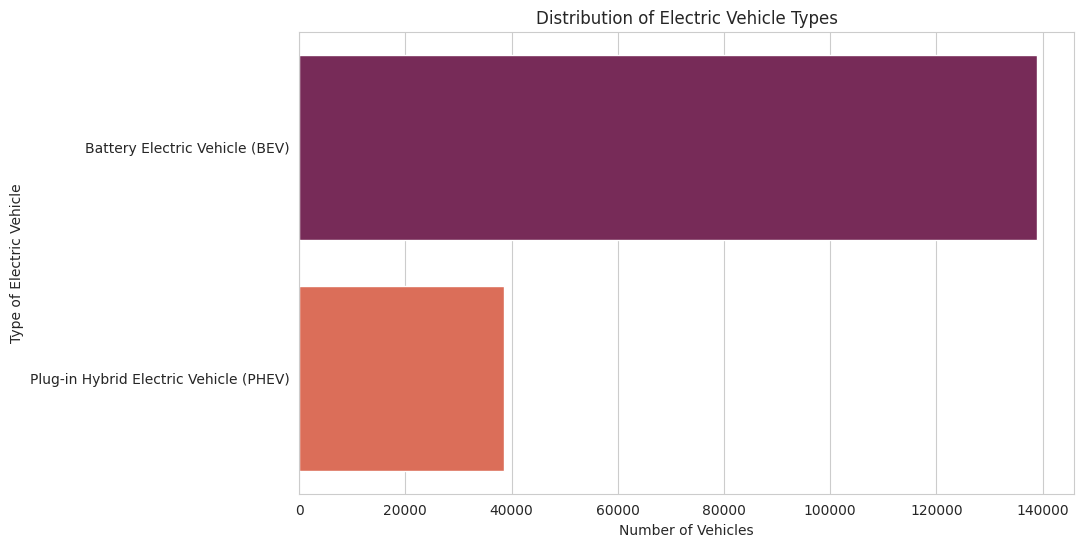

In [17]:
# analysing the distribution of Ev vehicles

Ev_vehicle_distribution = ev_data['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=Ev_vehicle_distribution.values,y=Ev_vehicle_distribution.index,palette='rocket')
plt.xlabel('Number of Vehicles')
plt.ylabel('Type of Electric Vehicle')
plt.title('Distribution of Electric Vehicle Types')
plt.show()




/tmp/ipython-input-2513534443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_ditribution.values,y=ev_make_ditribution.index,palette='cubehelix')


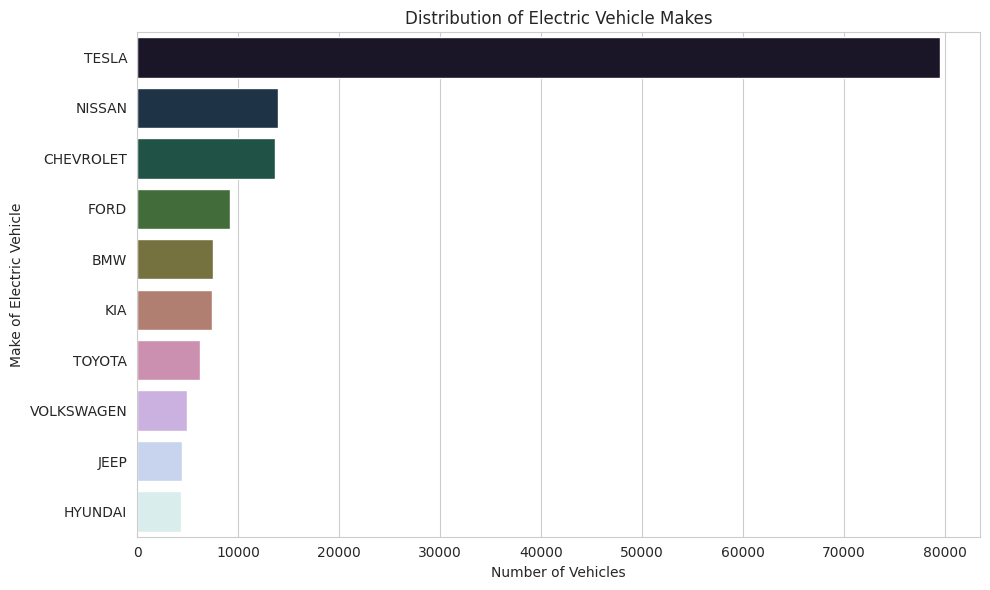

In [18]:
ev_make_ditribution = ev_data['Make'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_make_ditribution.values,y=ev_make_ditribution.index,palette='cubehelix')
plt.xlabel('Number of Vehicles')
plt.ylabel('Make of Electric Vehicle')
plt.title('Distribution of Electric Vehicle Makes')
plt.tight_layout()
plt.show()

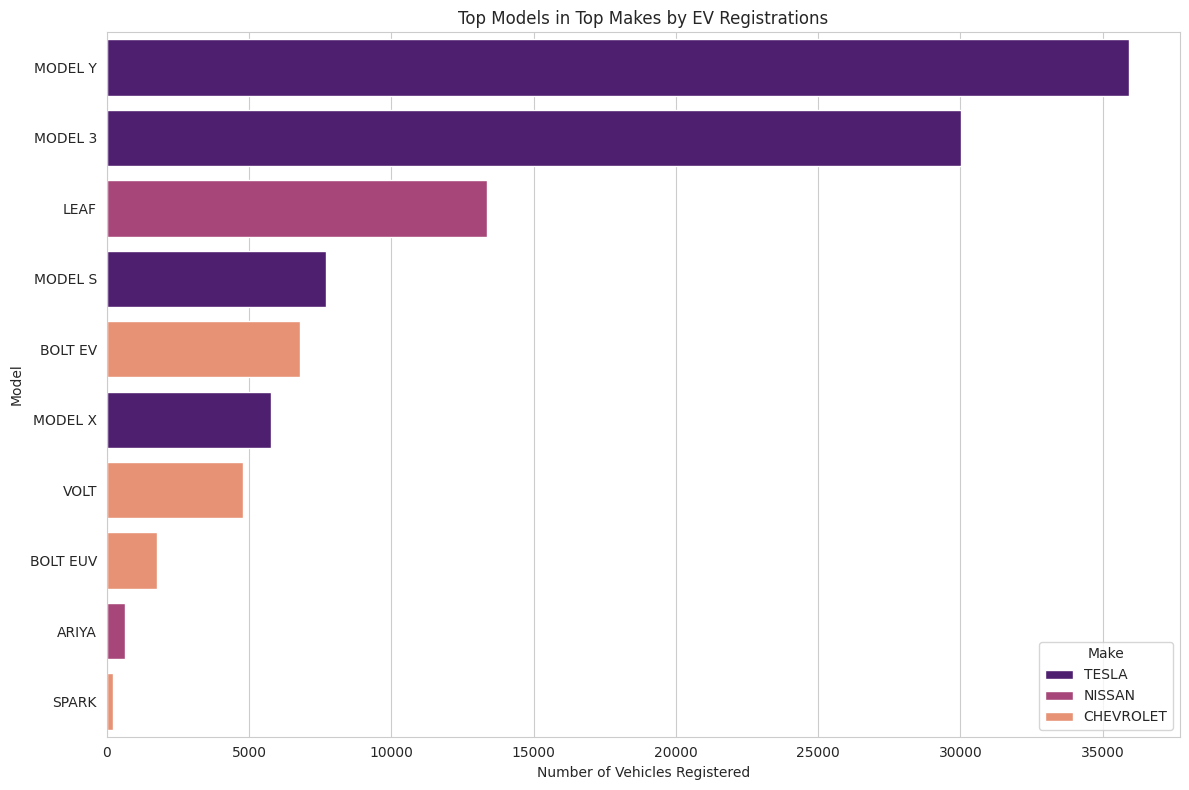

In [19]:
#selecting the popular model based on the manufacturer

top_3_make = ev_make_ditribution.head(3).index

top_makes_data = ev_data[ev_data['Make'].isin(top_3_make)]

ev_model_distribution_top_3_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

top_models = ev_model_distribution_top_3_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="magma")
plt.title('Top Models in Top Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make')
plt.tight_layout()
plt.show()

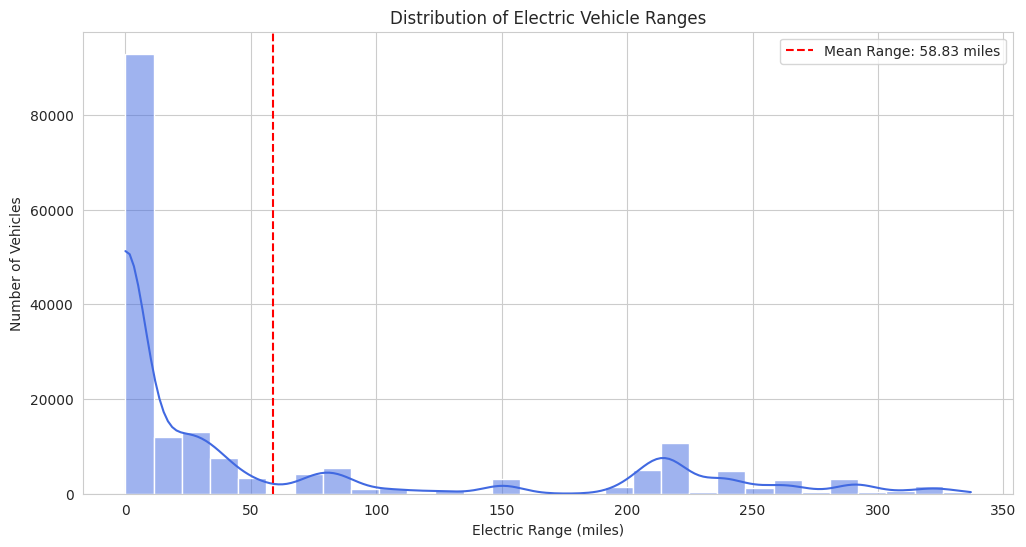

In [20]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

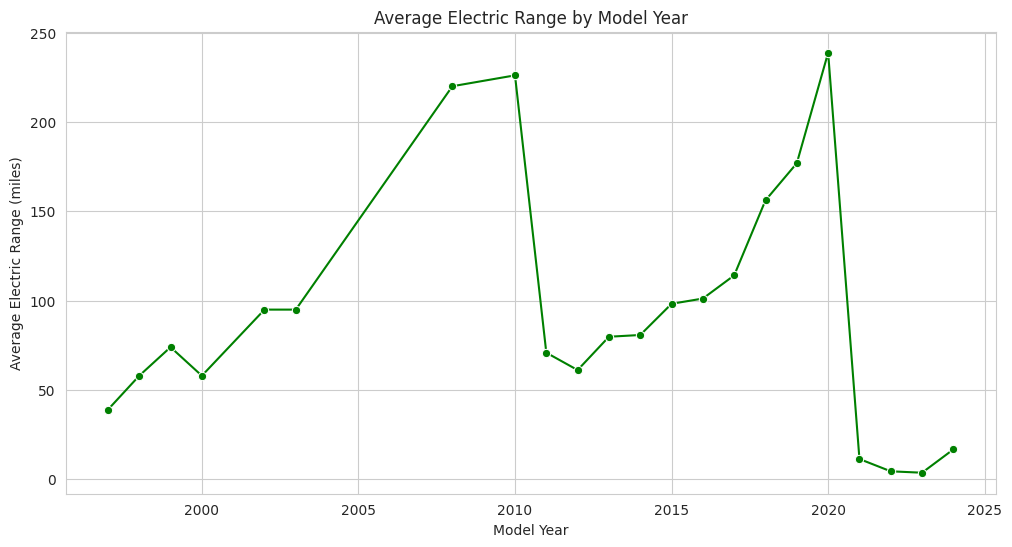

In [21]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

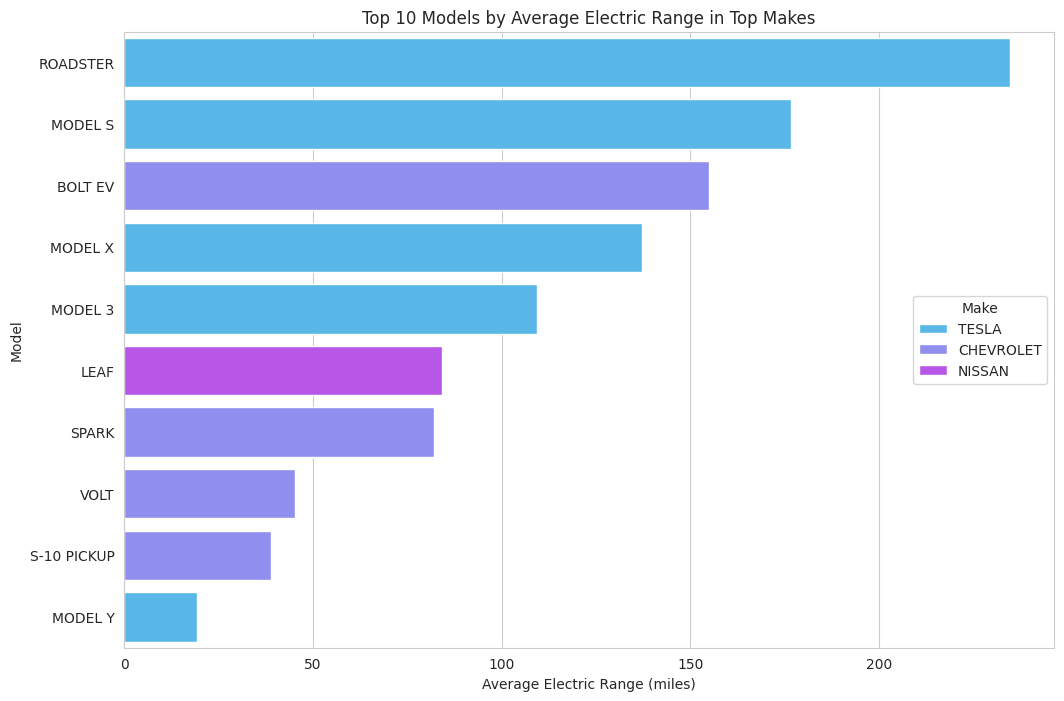

In [22]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [23]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

,count
Model Year,
1997,1
1998,1
1999,5
2000,7
2002,2
2003,1
2008,19
2010,23
2011,775


In [25]:
from scipy.optimize import curve_fit
import numpy as np

filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

def exp_growth(x,a,b):
  return a * np.exp(b * x)


# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{np.int64(2024): np.float64(79079.20951887172), np.int64(2025): np.float64(119653.96613244996), np.int64(2026): np.float64(181047.22718312938), np.int64(2027): np.float64(273940.760429255), np.int64(2028): np.float64(414497.0425238937), np.int64(2029): np.float64(627171.3562882638)}


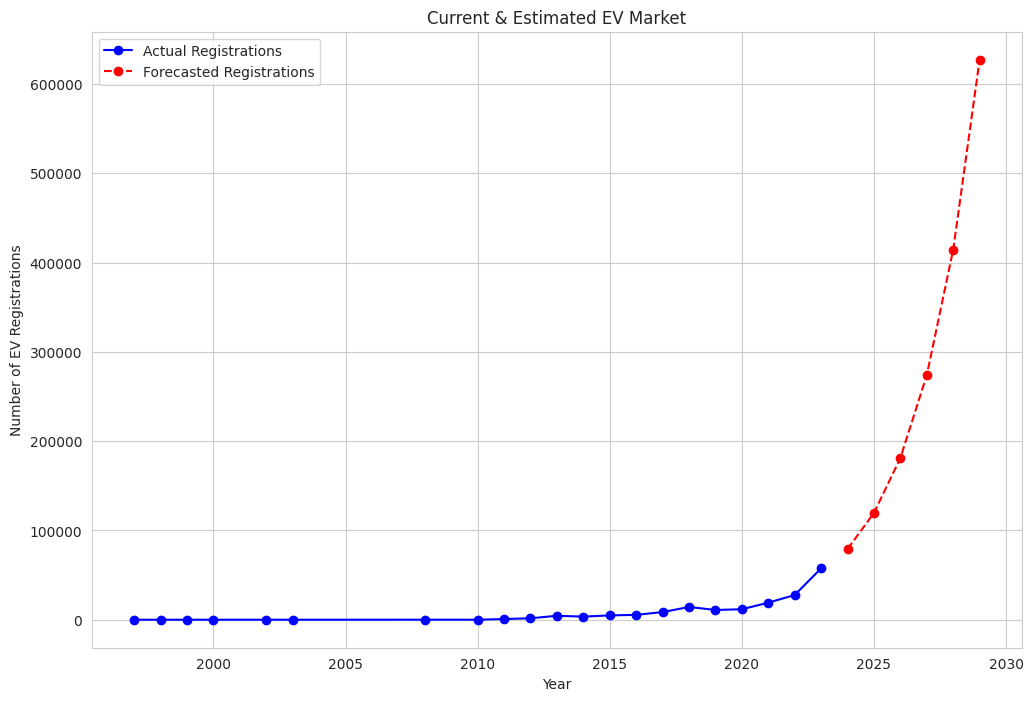

In [26]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()